<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana4/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Importar liberías y archivos

In [1]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Definición de funciones

In [2]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras
       
    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

In [4]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [5]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes 
  
  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [6]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [7]:
def genera_muestras_de_texto(texto, grado=0, 
                             num_muestras=100, 
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [8]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [9]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana

## Obtener muestras

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [10]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 100 # tamaño de la muestra
m = 1000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 991,muestra 992,muestra 993,muestra 994,muestra 995,muestra 996,muestra 997,muestra 998,muestra 999,muestra 1000
0,1543.958877,1595.284356,1660.931154,1601.097849,1686.384900,1717.716906,1694.114360,1759.831958,1657.497904,1701.910063,...,1738.525253,1645.018197,1651.084527,1738.678685,1653.340416,1839.993394,1641.772370,1673.642666,1692.050813,1709.474327
1,1625.555539,1649.176920,1743.736852,1515.420180,1774.547614,1629.923790,1594.780084,1732.363792,1646.097335,1743.459919,...,1685.334969,1657.238405,1648.930921,1666.213967,1747.131693,1764.812995,1687.149570,1784.057733,1659.104297,1765.767740
2,1669.816535,1679.152794,1582.057464,1719.840746,1735.756312,1697.037061,1639.552279,1662.853707,1691.289894,1725.967566,...,1639.146327,1733.739297,1555.169463,1627.337448,1724.934294,1681.778649,1673.903314,1680.284135,1733.399759,1637.795875
3,1596.327132,1591.003818,1644.727679,1729.455056,1613.035670,1681.748282,1744.246197,1694.821322,1635.227498,1696.325867,...,1730.635911,1720.428028,1655.214514,1730.416468,1650.632503,1639.416886,1730.852246,1802.593511,1656.994995,1795.900284
4,1675.994394,1724.858177,1742.111193,1623.253456,1650.818074,1736.800258,1682.397196,1657.045482,1733.288348,1592.399971,...,1743.989477,1791.057303,1565.265809,1757.870889,1651.538798,1703.548834,1755.213768,1720.700350,1713.349074,1728.303881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1628.950839,1666.856772,1624.107492,1700.325584,1668.697476,1733.645508,1693.367733,1764.676761,1536.678533,1630.329306,...,1731.988115,1651.552248,1665.616804,1716.387444,1704.567127,1605.752909,1766.644197,1667.321525,1749.803321,1580.965676
96,1698.847686,1727.405706,1660.371074,1658.763086,1706.280289,1683.653896,1789.447134,1697.458505,1675.998061,1687.068028,...,1752.321877,1752.336949,1742.183655,1696.917698,1597.552519,1857.665113,1719.153375,1687.248934,1673.322834,1679.875271
97,1693.797670,1631.590418,1751.859988,1731.515183,1676.143601,1662.628891,1621.648965,1669.208387,1660.897859,1639.920560,...,1708.605429,1687.748691,1716.678041,1578.590581,1501.765336,1622.630106,1666.951633,1672.963617,1754.357542,1526.111521
98,1748.672907,1717.075083,1644.644474,1651.210787,1591.577787,1764.257196,1797.878664,1695.421867,1722.586742,1602.327045,...,1651.061059,1602.144931,1616.333797,1536.068099,1656.159560,1619.847130,1698.749313,1676.126549,1660.099804,1775.167922


<h2> Distribución de cada muestra

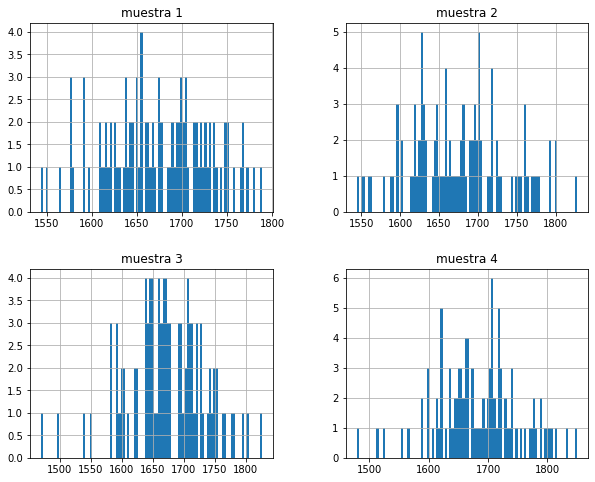

In [11]:
alturas_hombres.iloc[:,0:4].hist(figsize = (10,8), bins=100)
plt.show()

## Distribución de los promedios

In [12]:
medias = alturas_hombres.mean()
medias

muestra 1       1673.567863
muestra 2       1675.457968
muestra 3       1673.601678
muestra 4       1685.622649
muestra 5       1672.371201
                   ...     
muestra 996     1681.071711
muestra 997     1673.996423
muestra 998     1678.897340
muestra 999     1681.692707
muestra 1000    1672.413886
Length: 1000, dtype: float64

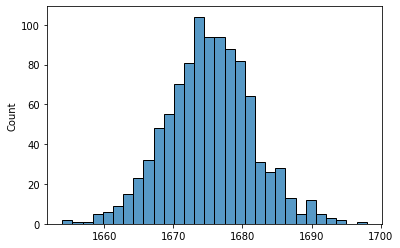

In [13]:
sns.histplot(medias,  bins=30)
plt.show()

## Distribución de los errores

In [14]:
errores = mu - medias
errores

muestra 1        1.432137
muestra 2       -0.457968
muestra 3        1.398322
muestra 4      -10.622649
muestra 5        2.628799
                  ...    
muestra 996     -6.071711
muestra 997      1.003577
muestra 998     -3.897340
muestra 999     -6.692707
muestra 1000     2.586114
Length: 1000, dtype: float64

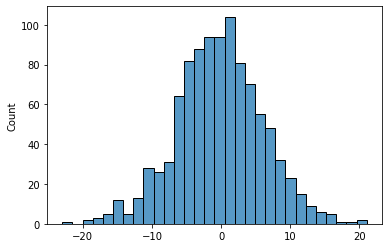

In [15]:
sns.histplot(errores,  bins=30)
plt.show()

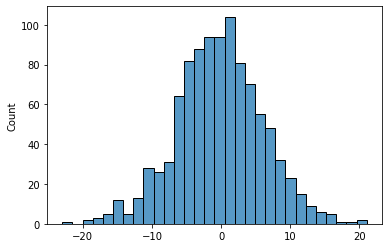

In [16]:
sns.histplot(errores,  bins=30)
plt.show()

# Distribución Bernoulli

#### Preprocesar libro y obtener probabilidades de los caracteres 

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar) 
libro_limpio = limpiar_texto(libro)

In [20]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

0.38405272562528125

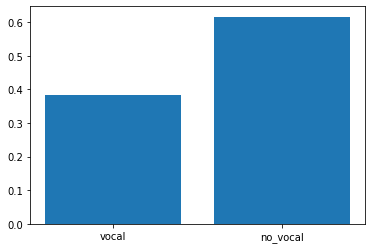

In [21]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

### Obtener muestras

In [22]:
%%time
n = 200 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 19.7 s, sys: 112 ms, total: 19.8 s
Wall time: 23.3 s


In [23]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,iosrase s urs t oeat rnleh ssnrcr proyletesnl...,74,0.370,0.014053
muestra_2,oeeanneasetaga sas nav isanopeyur aseedaosr...,76,0.380,0.004053
muestra_3,i everteseoir pidnnalis ret oiugoar e d aue...,75,0.375,0.009053
muestra_4,uol annoia aaaegua eooldnerssaeiidiocro e aaa...,80,0.400,-0.015947
muestra_5,rurn s r ilbeao uut ml ipsanlso stnaaecsd...,79,0.395,-0.010947


### Distribución de los promedios

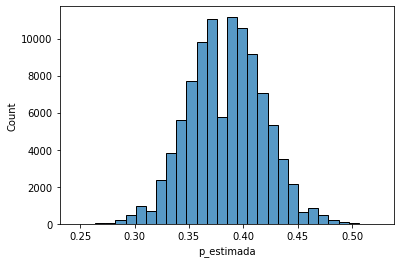

In [24]:
sns.histplot(muestras['p_estimada'],  bins=30)
plt.show()

## Distribución de los errores

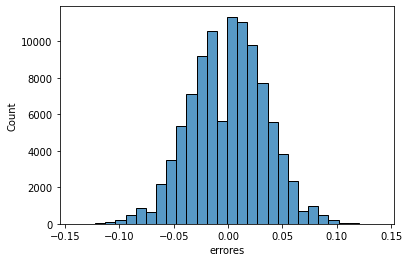

In [25]:
sns.histplot(muestras['errores'],  bins=30)
plt.show()

# Distribución exponencial

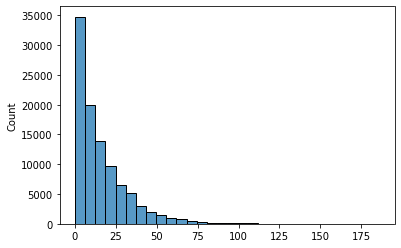

In [26]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n).values
sns.histplot(X,  bins=30)
plt.show()

In [27]:
X.mean()

15.86532

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

### Obtener muestras

In [28]:
n = 200 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,33,0,12,15,78,26,4,23,6,25,...,2,49,3,16,24,21,0,7,7,23
1,23,30,17,1,27,6,4,2,14,1,...,7,0,9,7,17,3,1,28,0,1
2,6,24,20,1,20,4,10,1,3,20,...,39,8,34,20,7,5,6,38,21,2
3,16,5,1,6,22,30,42,2,25,6,...,20,9,2,0,13,39,9,6,36,5
4,2,33,17,10,8,0,20,15,5,3,...,12,7,80,2,23,44,4,30,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,24,20,15,16,34,6,28,19,12,20,...,6,4,0,1,0,49,8,14,21,20
196,31,8,2,1,16,7,2,0,63,52,...,39,11,24,18,3,4,9,5,71,19
197,3,4,17,12,37,23,14,18,41,33,...,21,6,11,10,1,11,11,80,13,33
198,25,24,13,3,2,8,27,3,6,23,...,36,7,9,20,36,17,25,12,2,36


### Distribución de cada muestra

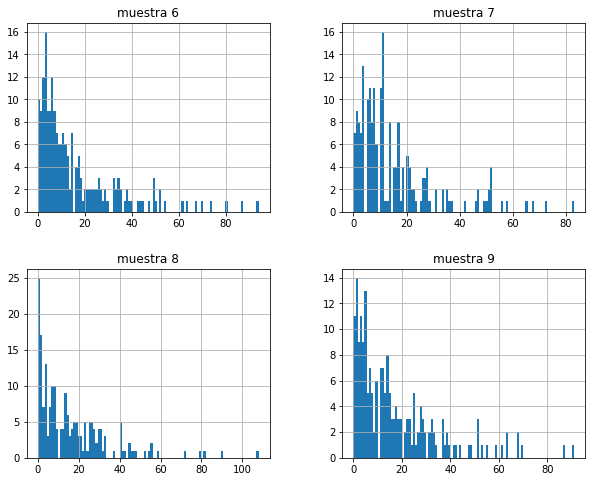

In [29]:
muestras_exp.iloc[:,5:9].hist(figsize = (10,8), bins=100)
plt.show()

### Distribución de los promedios

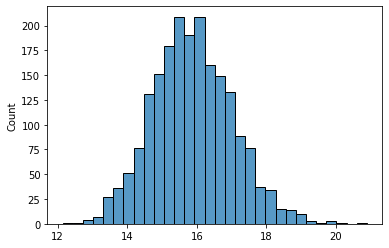

In [30]:
sns.histplot(muestras_exp.mean(),  bins=30)
plt.show()


## Distribución de los errores

In [31]:
X.mean()

15.86532

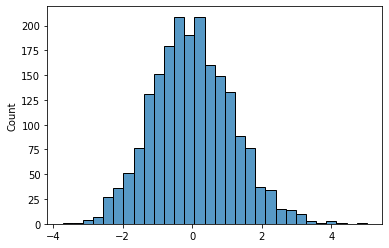

In [32]:
errores = muestras_exp.mean() - X.mean()
sns.histplot(errores,  bins=30)
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

